<a href="https://colab.research.google.com/github/VildaAprilia/Tugas-Stariktik-Terapan/blob/main/Tugas_statistik_terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

header = ['tahun','jenis_ternak','jumlah_peternak','satuan_peternak']
data = [
    [2010, 'Sapi perah'  , 127,'orang'],
    [2010,'Sapi potong',0,'orang'],
    [2010,'Kerbau',12,'orang'],
    [2010,'Kambing/ Domba',362,'orang'],
    [2010,'Ayam ras',14,'orang'],
    [2010,'Itik',104,'orang'],
    [2011,'Sapi perah'  ,135,'orang'],
    [2011,'Sapi potong',0,'orang'],
    [2011,'Kerbau',15,'orang'],
    [2011,'Kambing/Domba',340,'orang'],
    [2011,'Ayamras',13,'orang'],
    [2011,'Itik',87,'orang'],
    [2012,'Sapi perah'  ,116,'orang'],
    [2012,'Sapi potong',92,'orang'],
    [2012,'Kerbau',24,'orang'],
    [2012,'Kambing/ Domba',564,'orang'],
    [2012,'Ayam ras',15,'orang'],
    [2012,'Itik',114,'orang'],
    [2013,'Sapi perah'  ,133,'orang'],
    [2013,'Sapi potong',200,'orang'],
    [2013,'Kerbau',48,'orang'],
    [2013,'Kambing/ Domba',496,'orang'],
    [2013,'Ayam ras',0,'orang'],
    [2013,'Itik',301,'orang'],
    [2014,'Sapi perah'  ,113,'orang'],
    [2015,'Sapi perah'  ,115,'orang'],
    [2016,'Sapi perah'  ,87,'orang'],
    [2017,'Sapi perah'  ,87,'orang']
]

with open('datasetternak.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [ ]:
import pandas as pan
import numpy as num
import statistics
dataset = pan.read_csv("datasetternak.csv")
dataset.head()

,tahun,jenis_ternak,jumlah_peternak,satuan_peternak
0,2010,Sapi perah,127,orang
1,2010,Sapi potong,0,orang
2,2010,Kerbau,12,orang
3,2010,Kambing/ Domba,362,orang
4,2010,Ayam ras,14,orang


In [ ]:
dataset.shape

(28, 4)

In [ ]:
print(dataset.isnull().sum())

tahun              0
jenis_ternak       0
jumlah_peternak    0
satuan_peternak    0
dtype: int64


In [ ]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

tahun              0
jenis_ternak       0
jumlah_peternak    0
satuan_peternak    0
dtype: int64


In [ ]:
dataset["tahun"] = dataset["tahun"].replace(num.NaN, dataset["tahun"].mean())
print(dataset["tahun"][:10])

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2011
7    2011
8    2011
9    2011
Name: tahun, dtype: int64


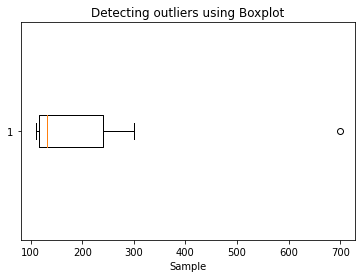

In [ ]:
import matplotlib.pyplot as plt

sample= [127,301,110,220,113,700,116,135]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()
plt.show(sample)

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    a = 2
    mean = np.mean(data)
    std = np.std(data)
    # print(mode, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > a):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [700]


In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [700]


In [ ]:
# Trimming
for i in sample_outliers:
  #a = sample
  #a.remove(i)
  #print(a)
    a = np.delete(sample, np.where(sample==i))
print(a)
print(len(sample), len(a))

[127 301 110 220 113 116 135]
7 7


In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(a>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

111.8 252.40000000000003
New array: [127.  252.4 111.8 220.  113.  116.  135. ]


In [ ]:
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [127, 301, 110, 220, 113, 116, 135]
New array:  [127 301 110 220 113 116 135]


Text(0.5, 0, 'Sample')

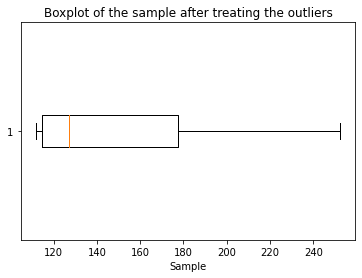

In [ ]:
plt.boxplot(b, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")